# Lab 1

### 1. Image Preprocessing

- **Algorithm**: Normalized a grayscale image to the range [0, 1].
- **Accuracy**: Ensures that pixel values are properly scaled for further processing.
- **Visualization**: Displayed the original and normalized images.

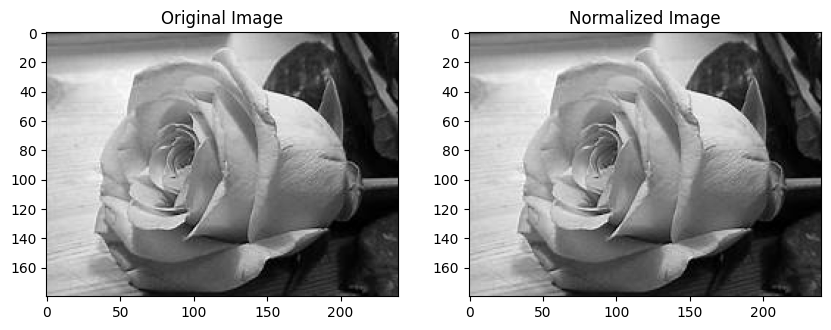

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('rose.jpeg', cv2.IMREAD_GRAYSCALE)

# Normalize the image to the range [0, 1]
normalized_image = image / 255.0

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Normalized Image')
plt.imshow(normalized_image, cmap='gray')
plt.show()


### 2. Apply Convolution

- **Algorithm**: Applied Sobel filter (X direction) for edge detection and a sharpening filter.
- **Accuracy**: Use filters to emphasize certain features.
- **Visualization**: Shown the original, edge-detected, and sharpened images.

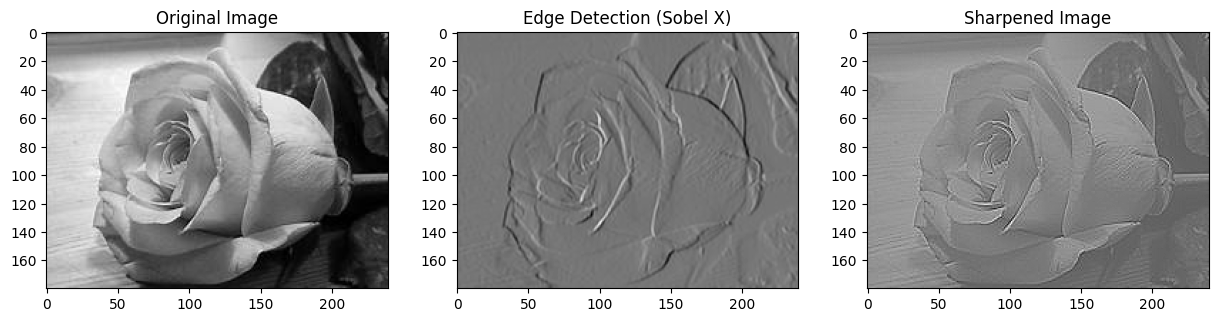

In [6]:
# Define Sobel X kernel and Sharpening kernel
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

# Apply convolution using Sobel filter (X direction)
edge_x = cv2.filter2D(normalized_image, -1, sobel_x)

# Apply convolution using Sharpening filter
sharpened_image = cv2.filter2D(normalized_image, -1, sharpen_kernel)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(normalized_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Edge Detection (Sobel X)')
plt.imshow(edge_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.show()


### 3. Apply Correlation

- **Algorithm**: Applied correlation to the grayscale and convolved images.
- **Accuracy**: Measure the similarity between the original and filtered images.
- **Visualization**: Not applicable, as this is a numerical operation.

Correlation with Edge Detected Image: 0.009757842549018566
Correlation with Sharpened Image: 0.9181090644264276


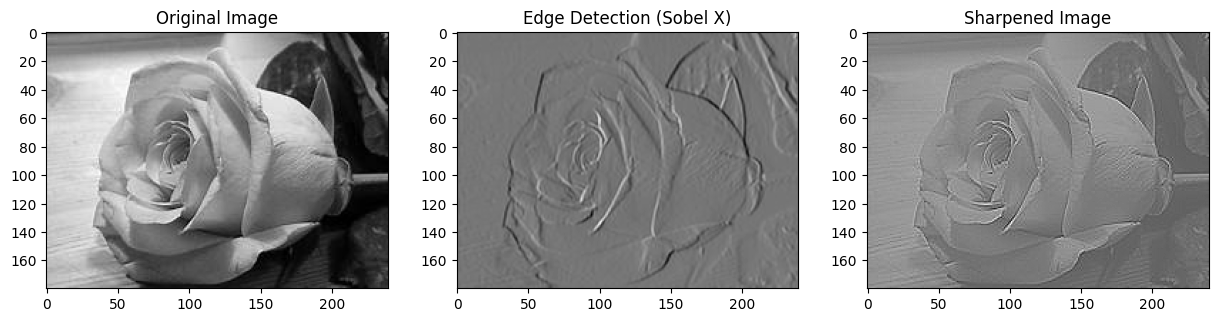

In [7]:
# Function to compute correlation
def compute_correlation(image1, image2):
    return np.corrcoef(image1.flatten(), image2.flatten())[0, 1]

# Correlation between original and convolved images
corr_edge = compute_correlation(normalized_image, edge_x)
corr_sharpen = compute_correlation(normalized_image, sharpened_image)

print(f'Correlation with Edge Detected Image: {corr_edge}')
print(f'Correlation with Sharpened Image: {corr_sharpen}')

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(normalized_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Edge Detection (Sobel X)')
plt.imshow(edge_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.show()

### 4. Edge Detection and Enhancement

- **Algorithm**: Applied Gaussian blur to the original and edge-detected images to enhance edges.
- **Accuracy**: The blur can help smooth noise while enhancing important features.
- **Visualization**: Shown the blurred images and the enhanced edge-detected image.

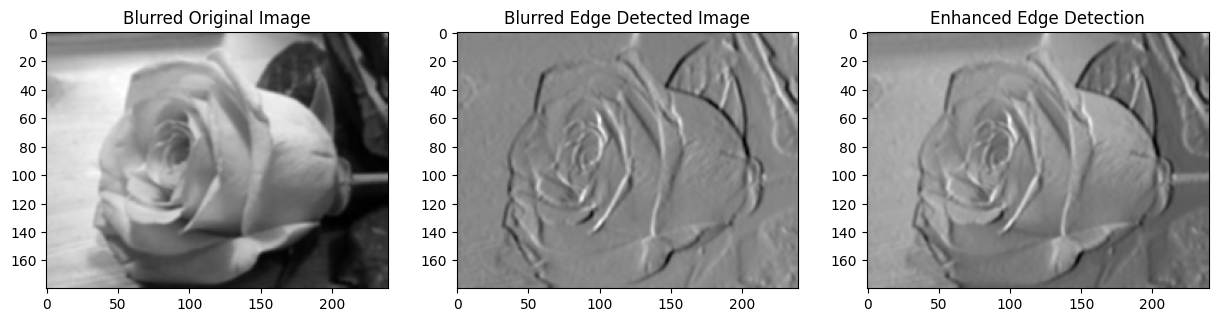

In [8]:
# Apply Gaussian Blur to original and edge-detected images
blurred_original = cv2.GaussianBlur(normalized_image, (5, 5), 0)
blurred_edge = cv2.GaussianBlur(edge_x, (5, 5), 0)

# Enhanced edge detection (combining original blurred with edge-detected blurred)
enhanced_edge = cv2.addWeighted(blurred_original, 0.5, blurred_edge, 0.5, 0)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Blurred Original Image')
plt.imshow(blurred_original, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Blurred Edge Detected Image')
plt.imshow(blurred_edge, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Enhanced Edge Detection')
plt.imshow(enhanced_edge, cmap='gray')
plt.show()


### 5. Comparison and Analysis

- **Interpretation**:
    - **Correlation Results**: Higher correlation indicates greater similarity between images.
    - **Effect of Gaussian Blur**: Gaussian blur helps reduce noise while enhancing critical features when combined with edge detection, leading to a cleaner and more pronounced edge detection result.

In [9]:

print(f"Correlation between the original and edge-detected images: {corr_edge:.4f}")
print(f"Correlation between the original and sharpened images: {corr_sharpen:.4f}")
print("The effect of combining edge detection with Gaussian blur results in a cleaner, enhanced edge-detected image, reducing noise and emphasizing important features.")

Correlation between the original and edge-detected images: 0.0098
Correlation between the original and sharpened images: 0.9181
The effect of combining edge detection with Gaussian blur results in a cleaner, enhanced edge-detected image, reducing noise and emphasizing important features.
